* Veri setinden  1- 3  feature atılabilir
*  Accrucy en yüksek çıkan  1. çıkar 5 sonuç ortalamasına göre
*  2 adet veri görselleştirmesi istiyoruz
* 50 dk süre

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [34]:
dataset = pd.read_csv("Yapay_Zeka/Job_Placement_Data.csv")
dataset

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [35]:
print(dataset.info()) # boş veri var mı yok mu 
print(dataset.status.unique()) # sınıflar
print(len(dataset.status.unique())) #kaç sınıf var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB
None
['Placed' 'Not Placed']
2


In [36]:
XSample = dataset.iloc[:,:-1] # Özellikler ayrıldı
ySample = dataset.status # Sınıf ayrıldı.

print(XSample)
print(ySample)

    gender  ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
0        M           67.00    Others           91.00    Others    Commerce   
1        M           79.33   Central           78.33    Others     Science   
2        M           65.00   Central           68.00   Central        Arts   
3        M           56.00   Central           52.00   Central     Science   
4        M           85.80   Central           73.60   Central    Commerce   
..     ...             ...       ...             ...       ...         ...   
210      M           80.60    Others           82.00    Others    Commerce   
211      M           58.00    Others           60.00    Others     Science   
212      M           67.00    Others           67.00    Others    Commerce   
213      F           74.00    Others           66.00    Others    Commerce   
214      M           62.00   Central           58.00    Others     Science   

     degree_percentage undergrad_degree work_experience  emp_te

                     ssc_percentage  hsc_percentage  degree_percentage  \
ssc_percentage             1.000000        0.511472           0.538404   
hsc_percentage             0.511472        1.000000           0.434206   
degree_percentage          0.538404        0.434206           1.000000   
emp_test_percentage        0.261993        0.245113           0.224470   
mba_percent                0.388478        0.354823           0.402364   

                     emp_test_percentage  mba_percent  
ssc_percentage                  0.261993     0.388478  
hsc_percentage                  0.245113     0.354823  
degree_percentage               0.224470     0.402364  
emp_test_percentage             1.000000     0.218055  
mba_percent                     0.218055     1.000000  


C:\Users\Kaan\AppData\Local\Temp\ipykernel_7584\315405699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset.corr())
C:\Users\Kaan\AppData\Local\Temp\ipykernel_7584\315405699.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<AxesSubplot: >

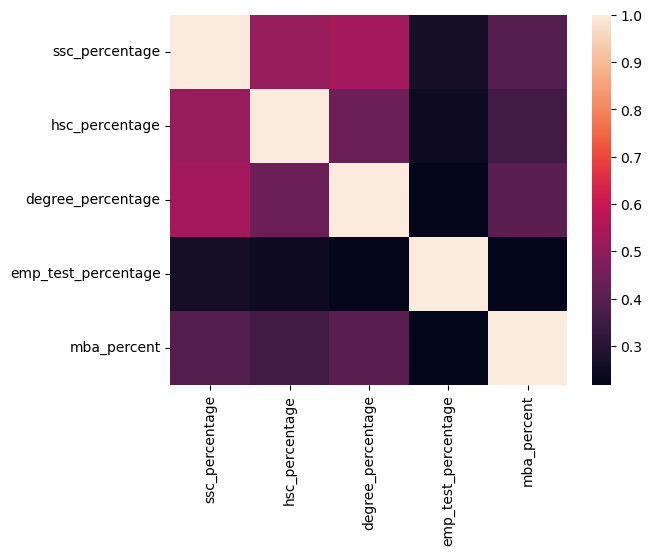

In [37]:
print(dataset.corr())
sns.heatmap(dataset.corr())

In [45]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

ySample = le.fit_transform(ySample)
print(ySample)

[1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0]


In [48]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

XSample.gender = le.fit_transform(XSample.gender)
print(XSample)

     gender  ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
0         1           67.00    Others           91.00    Others    Commerce   
1         1           79.33   Central           78.33    Others     Science   
2         1           65.00   Central           68.00   Central        Arts   
3         1           56.00   Central           52.00   Central     Science   
4         1           85.80   Central           73.60   Central    Commerce   
..      ...             ...       ...             ...       ...         ...   
210       1           80.60    Others           82.00    Others    Commerce   
211       1           58.00    Others           60.00    Others     Science   
212       1           67.00    Others           67.00    Others    Commerce   
213       0           74.00    Others           66.00    Others    Commerce   
214       1           62.00   Central           58.00    Others     Science   

     degree_percentage undergrad_degree work_experi

In [51]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

XSample.ssc_board = le.fit_transform(XSample.ssc_board)
print(XSample)

     gender  ssc_percentage  ssc_board  hsc_percentage hsc_board hsc_subject  \
0         1           67.00          1           91.00    Others    Commerce   
1         1           79.33          0           78.33    Others     Science   
2         1           65.00          0           68.00   Central        Arts   
3         1           56.00          0           52.00   Central     Science   
4         1           85.80          0           73.60   Central    Commerce   
..      ...             ...        ...             ...       ...         ...   
210       1           80.60          1           82.00    Others    Commerce   
211       1           58.00          1           60.00    Others     Science   
212       1           67.00          1           67.00    Others    Commerce   
213       0           74.00          1           66.00    Others    Commerce   
214       1           62.00          0           58.00    Others     Science   

     degree_percentage undergrad_degree

In [54]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

XSample.hsc_board = le.fit_transform(XSample.hsc_board)
print(XSample)

     gender  ssc_percentage  ssc_board  hsc_percentage  hsc_board hsc_subject  \
0         1           67.00          1           91.00          1    Commerce   
1         1           79.33          0           78.33          1     Science   
2         1           65.00          0           68.00          0        Arts   
3         1           56.00          0           52.00          0     Science   
4         1           85.80          0           73.60          0    Commerce   
..      ...             ...        ...             ...        ...         ...   
210       1           80.60          1           82.00          1    Commerce   
211       1           58.00          1           60.00          1     Science   
212       1           67.00          1           67.00          1    Commerce   
213       0           74.00          1           66.00          1    Commerce   
214       1           62.00          0           58.00          1     Science   

     degree_percentage unde

In [57]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

XSample. hsc_subject = le.fit_transform(XSample. hsc_subject)
print(XSample)

     gender  ssc_percentage  ssc_board  hsc_percentage  hsc_board  \
0         1           67.00          1           91.00          1   
1         1           79.33          0           78.33          1   
2         1           65.00          0           68.00          0   
3         1           56.00          0           52.00          0   
4         1           85.80          0           73.60          0   
..      ...             ...        ...             ...        ...   
210       1           80.60          1           82.00          1   
211       1           58.00          1           60.00          1   
212       1           67.00          1           67.00          1   
213       0           74.00          1           66.00          1   
214       1           62.00          0           58.00          1   

     hsc_subject  degree_percentage undergrad_degree work_experience  \
0              1              58.00         Sci&Tech              No   
1              2           

In [60]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

XSample.undergrad_degree = le.fit_transform(XSample.  undergrad_degree)
print(XSample)

     gender  ssc_percentage  ssc_board  hsc_percentage  hsc_board  \
0         1           67.00          1           91.00          1   
1         1           79.33          0           78.33          1   
2         1           65.00          0           68.00          0   
3         1           56.00          0           52.00          0   
4         1           85.80          0           73.60          0   
..      ...             ...        ...             ...        ...   
210       1           80.60          1           82.00          1   
211       1           58.00          1           60.00          1   
212       1           67.00          1           67.00          1   
213       0           74.00          1           66.00          1   
214       1           62.00          0           58.00          1   

     hsc_subject  degree_percentage  undergrad_degree work_experience  \
0              1              58.00                 2              No   
1              2         

In [61]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

XSample.work_experience = le.fit_transform(XSample.work_experience)
print(XSample)

     gender  ssc_percentage  ssc_board  hsc_percentage  hsc_board  \
0         1           67.00          1           91.00          1   
1         1           79.33          0           78.33          1   
2         1           65.00          0           68.00          0   
3         1           56.00          0           52.00          0   
4         1           85.80          0           73.60          0   
..      ...             ...        ...             ...        ...   
210       1           80.60          1           82.00          1   
211       1           58.00          1           60.00          1   
212       1           67.00          1           67.00          1   
213       0           74.00          1           66.00          1   
214       1           62.00          0           58.00          1   

     hsc_subject  degree_percentage  undergrad_degree  work_experience  \
0              1              58.00                 2                0   
1              2       

In [62]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

XSample. specialisation = le.fit_transform(XSample.specialisation)
print(XSample)

     gender  ssc_percentage  ssc_board  hsc_percentage  hsc_board  \
0         1           67.00          1           91.00          1   
1         1           79.33          0           78.33          1   
2         1           65.00          0           68.00          0   
3         1           56.00          0           52.00          0   
4         1           85.80          0           73.60          0   
..      ...             ...        ...             ...        ...   
210       1           80.60          1           82.00          1   
211       1           58.00          1           60.00          1   
212       1           67.00          1           67.00          1   
213       0           74.00          1           66.00          1   
214       1           62.00          0           58.00          1   

     hsc_subject  degree_percentage  undergrad_degree  work_experience  \
0              1              58.00                 2                0   
1              2       

In [119]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest = train_test_split(XSample,ySample,test_size=0.2,random_state=42)
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(172, 12)
(43, 12)
(172,)
(43,)


In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrain =sc.fit_transform(XTrain)
XTest = sc.fit_transform(XTest)
print(XTrain)
print(XTest)

[[ 0.72258141 -1.39473047 -0.96570403 ... -0.05132613  1.13724814
  -1.15170167]
 [ 0.72258141  0.26292848 -0.96570403 ... -1.32641199 -0.87931557
  -0.03847026]
 [ 0.72258141  0.53920498 -0.96570403 ...  1.70829235 -0.87931557
  -0.01144188]
 ...
 [-1.38392711 -0.63681196 -0.96570403 ... -0.05132613 -0.87931557
  -0.46585653]
 [-1.38392711  0.98124736 -0.96570403 ...  0.21119155  1.13724814
   1.67445333]
 [-1.38392711  0.90757363  1.03551396 ... -1.13889936 -0.87931557
  -0.15503015]]
[[ 8.08607540e-01  1.00753552e-01  1.29903811e+00 -9.25404068e-01
   9.77008421e-01 -9.77008421e-01 -3.93054872e-01 -7.13969835e-01
  -8.08607540e-01  1.40895365e+00 -9.32504808e-01 -1.79172269e+00]
 [ 8.08607540e-01 -8.88483187e-02  1.29903811e+00 -5.37200609e-02
   9.77008421e-01 -9.77008421e-01  8.71188942e-01 -7.13969835e-01
   1.23669388e+00 -8.52892945e-01 -9.32504808e-01  1.34147594e+00]
 [-1.23669388e+00  1.33316571e+00  1.29903811e+00 -4.27298921e-01
   9.77008421e-01  1.02353263e+00  8.7118894

# Decision tree

[1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 1]
[1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1]


[Text(0.4605263157894737, 0.9444444444444444, 'x[1] <= -0.428\nlog_loss = 0.904\nsamples = 172\nvalue = [55, 117]'),
 Text(0.21052631578947367, 0.8333333333333334, 'x[3] <= -0.572\nlog_loss = 0.881\nsamples = 60\nvalue = [42, 18]'),
 Text(0.15789473684210525, 0.7222222222222222, 'log_loss = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.2631578947368421, 0.7222222222222222, 'x[6] <= -0.078\nlog_loss = 0.994\nsamples = 33\nvalue = [15, 18]'),
 Text(0.21052631578947367, 0.6111111111111112, 'x[1] <= -1.087\nlog_loss = 0.971\nsamples = 25\nvalue = [15, 10]'),
 Text(0.10526315789473684, 0.5, 'x[11] <= -1.338\nlog_loss = 0.469\nsamples = 10\nvalue = [9, 1]'),
 Text(0.05263157894736842, 0.3888888888888889, 'log_loss = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15789473684210525, 0.3888888888888889, 'log_loss = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.3157894736842105, 0.5, 'x[8] <= 0.358\nlog_loss = 0.971\nsamples = 15\nvalue = [6, 9]'),
 Text(0.2631578947368421, 0.3888888888888889, 'x[9] 

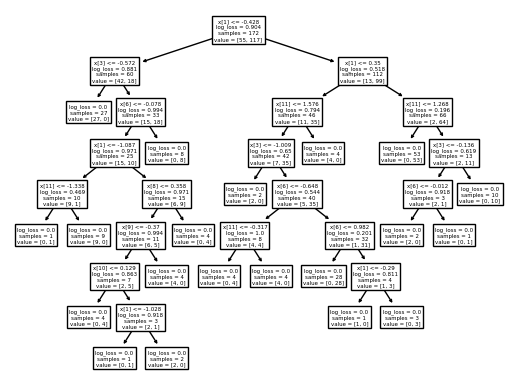

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifer = DecisionTreeClassifier(criterion="log_loss",splitter="best",random_state=42)
classifer.fit(XTrain,yTrain)
yTestPred =classifer.predict(XTest)
print(yTestPred)
print(yTest)
tree.plot_tree(classifer)

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.84      0.84      0.84        31

    accuracy                           0.77        43
   macro avg       0.71      0.71      0.71        43
weighted avg       0.77      0.77      0.77        43



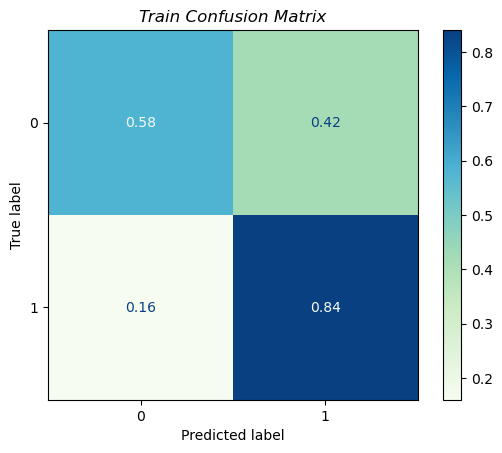

In [122]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
print(classification_report(yTest,yTestPred))
cm = confusion_matrix(yTest,yTestPred,normalize = "true").round(2)
#cmn = cm.astype('float') / cm.sum(axis = 1) [:,np.newaxis]
#cmn = cmn.round
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format = "g")
plt.title(f"Train Confusion Matrix",style ="italic")
plt.show()

# SVC

In [123]:
from sklearn.svm import SVC
classifer = SVC(C =1,kernel="linear",gamma=0.01)
classifer.fit(XTrain,yTrain)
yTestPred =classifer.predict(XTest)
print(yTestPred)
print(yTest)

[1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1]
[1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1]


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.93      0.90      0.92        31

    accuracy                           0.88        43
   macro avg       0.85      0.87      0.86        43
weighted avg       0.89      0.88      0.89        43



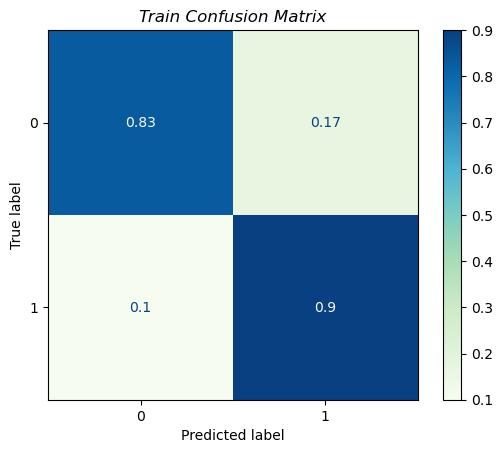

In [124]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
print(classification_report(yTest,yTestPred))
cm = confusion_matrix(yTest,yTestPred,normalize = "true").round(2)
#cmn = cm.astype('float') / cm.sum(axis = 1) [:,np.newaxis]
#cmn = cmn.round
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format = "g")
plt.title(f"Train Confusion Matrix",style ="italic")
plt.show()

# Navie Bayes


In [75]:
from sklearn.naive_bayes import GaussianNB

classifer = GaussianNB()

classifer.fit(XTrain,yTrain)
yTestPred = classifer.predict(XTest)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.81      0.81      0.81        27

    accuracy                           0.77        43
   macro avg       0.75      0.75      0.75        43
weighted avg       0.77      0.77      0.77        43



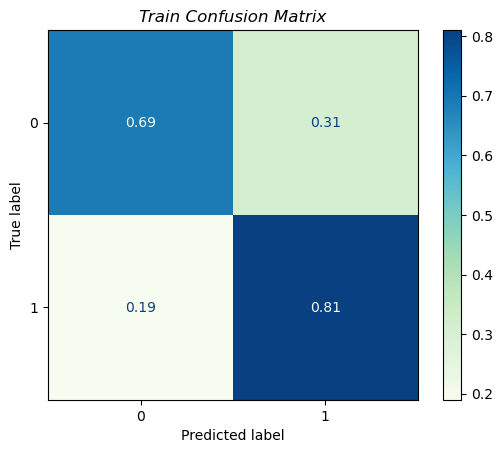

In [76]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
print(classification_report(yTest,yTestPred))
cm = confusion_matrix(yTest,yTestPred,normalize = "true").round(2)
#cmn = cm.astype('float') / cm.sum(axis = 1) [:,np.newaxis]
#cmn = cmn.round
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format = "g")
plt.title(f"Train Confusion Matrix",style ="italic")
plt.show()

# random forest


In [89]:
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier(n_estimators=100,max_depth=9,random_state=0)
classifer.fit(XTrain,yTrain)
yTestPred =classifer.predict(XTest)
print(yTest)
print(yTestPred)

[0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 0 0 1]
[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 1]


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.93      0.90      0.92        31

    accuracy                           0.88        43
   macro avg       0.85      0.87      0.86        43
weighted avg       0.89      0.88      0.89        43



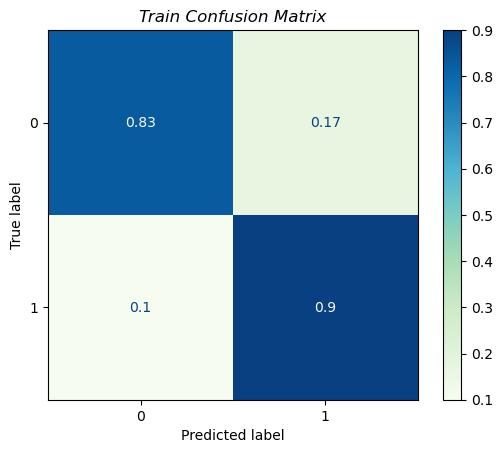

In [125]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
print(classification_report(yTest,yTestPred))
cm = confusion_matrix(yTest,yTestPred,normalize = "true").round(2)
#cmn = cm.astype('float') / cm.sum(axis = 1) [:,np.newaxis]
#cmn = cmn.round
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format = "g")
plt.title(f"Train Confusion Matrix",style ="italic")
plt.show()

# Logistic

In [115]:
from sklearn.linear_model import LogisticRegression
#solver(lbfgs,"libnear","newton-cg","newton-cholesky","sag","saga")
classifer = LogisticRegression(random_state=0,max_iter=10000,solver="newton-cholesky")
classifer.fit(XTrain,yTrain)
yTestPred =classifer.predict(XTest)

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.83      0.89      0.86        27

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43



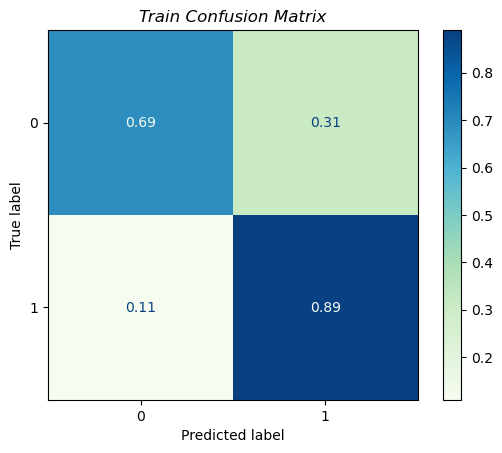

In [116]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
print(classification_report(yTest,yTestPred))
cm = confusion_matrix(yTest,yTestPred,normalize = "true").round(2)
#cmn = cm.astype('float') / cm.sum(axis = 1) [:,np.newaxis]
#cmn = cmn.round
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format = "g")
plt.title(f"Train Confusion Matrix",style ="italic")
plt.show()

# Grafik

In [110]:
dataset

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


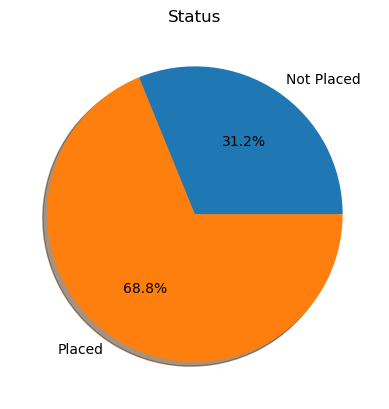

In [129]:
import numpy as np
import matplotlib.pyplot as plt

pie= np.unique(dataset.status,return_counts=True)
plt.title("Status")
plt.pie(pie[1],labels=pie[0],shadow=True,autopct='%1.1f%%')
plt.show()

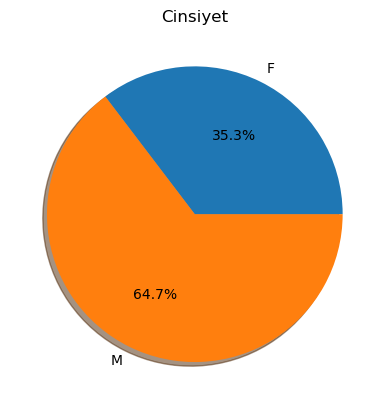

In [128]:
import numpy as np
import matplotlib.pyplot as plt

pie= np.unique(dataset.gender,return_counts=True)
plt.title("Cinsiyet")
plt.pie(pie[1],labels=pie[0],shadow=True,autopct='%1.1f%%')
plt.show()